## Kernel PCA
- 数据集

$$sklearn.datasets.make\_swiss\_roll$$

- 输出
$$X\Rightarrow F$$
$$H=I_N-\frac{1}{n}I_nI_N^T$$
$$S=F^THHF,A=F^TH,B=HF$$
$$BA=HFF^TH=HKH$$
$$K[i][j]=kernel function(x_i,x_j)$$

$$BAv=\lambda v,ABu=\lambda u$$
$$U=Av=F^THV$$

$$\frac{F^THV}{\left\|F^THV\right\|_2}=\lambda^{-\frac{1}{2}}F^THV$$
$$X_{pre}=FU=\lambda^{-\frac{1}{2}}KHV$$

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

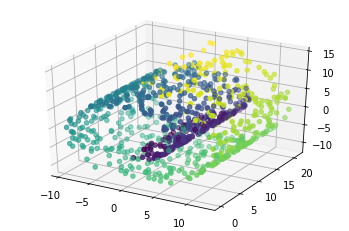

In [2]:
X,Y=make_swiss_roll(n_samples=1000)
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2],c=Y)

In [3]:
class kernel_PCA():
    def __init__(self,X,n_sample,q):
        self.q=q
        self.one=np.ones(n_sample).reshape(-1,1)
        self.H=np.diag(np.ones(n_sample))-(1/n_sample)*np.dot(self.one,self.one.T)
        self.K=np.dot(X,X.T)         #linear kernel
        
    def fit_transform(self,X):
        B=np.dot(np.dot(self.H,self.K),self.H)
        eig_val,eig_vec=LA.eig(B)
        u=np.argsort(eig_val)[::-1]
        eig_val=eig_val[u]
        eig_vec=eig_vec[:,u]
        v=eig_val**(-1/2)
        return v[:self.q]*(np.dot(np.dot(self.K,self.H),eig_vec[:,:self.q]))

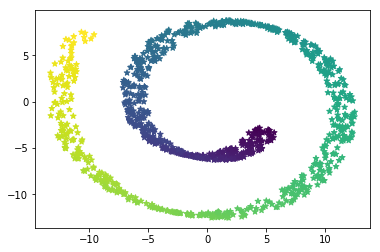

In [4]:
q,n_sample=2,X.shape[0]
kpca=kernel_PCA(X,n_sample,q)
X_pre=kpca.fit_transform(X)
plt.scatter(X_pre[:,0],X_pre[:,1],c=Y,marker='*')

### sklearn.decomposition.KernelPCA

(1000, 2)


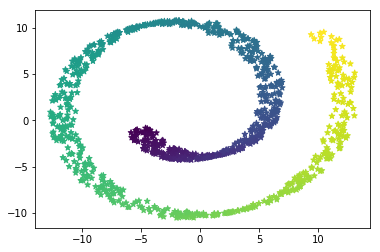

In [6]:
kpca=KernelPCA(n_components=2,kernel='linear')
X_pre=kpca.fit_transform(X)
print(X_pre.shape)
plt.scatter(X_pre[:,0],X_pre[:,1],c=Y,marker='*')